**(Q2.b)** For the moment, suppose you believed that
$$
\theta \in \{0.0, 0.1, \dots, 0.9, 1.0\}.
$$
Given that the results of the survey were
$$
\sum_{i=1}^{100} Y_i = 66,
$$
compute
$$
\Pr\left(\sum_{i=1}^{100} Y_i = 66 \;\middle|\; \theta\right)
$$
for each of these 11 values of $\theta$ and plot these probabilities as a function of $\theta$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
def binom_pmf(y, n, theta):
    if theta < 0.0 or theta > 1.0:
        return 0.0
    if theta == 0.0:
        return 1.0 if y == 0 else 0.0
    if theta == 1.0:
        return 1.0 if y == n else 0.0
    logpmf = (
        math.lgamma(n + 1)
        - math.lgamma(y + 1)
        - math.lgamma(n - y + 1)
        + y * math.log(theta)
        + (n - y) * math.log(1 - theta)
    )
    return math.exp(logpmf)

In [3]:
n = 100
y = 66

In [4]:
thetas_discrete = np.round(np.linspace(0.0, 1.0, 11), 1)
thetas_smooth = np.linspace(1e-6, 1 - 1e-6, 600)

probs_discrete = np.array([binom_pmf(y, n, t) for t in thetas_discrete])
probs_smooth = np.array([binom_pmf(y, n, t) for t in thetas_smooth])

df = pd.DataFrame({"theta": thetas_discrete, "P_sum_eq_66_given_theta": probs_discrete})
display(df)

,theta,P_sum_eq_66_given_theta
0,0.0,0.000000e+00
1,0.1,1.615140e-41
2,0.2,2.172722e-23
3,0.3,9.711829e-14
4,0.4,9.058719e-08
5,0.5,4.581053e-04
6,0.6,3.908293e-02
7,0.7,5.788395e-02
8,0.8,4.007964e-04
9,0.9,5.545880e-11


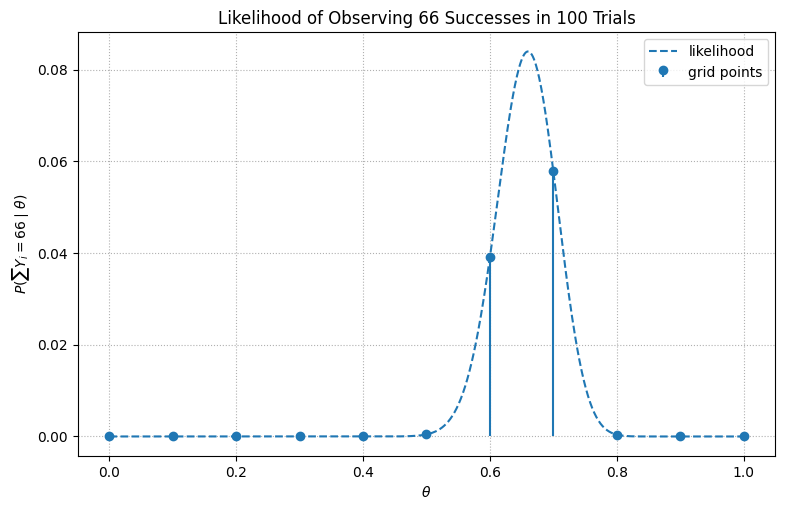

In [5]:
plt.figure(figsize=(9, 5.5))
plt.plot(thetas_smooth, probs_smooth, linestyle="--", label="likelihood")
markerline, stemlines, baseline = plt.stem(thetas_discrete, probs_discrete, basefmt=" ", label="grid points")
plt.title("Likelihood of Observing 66 Successes in 100 Trials")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$P(\sum Y_i = 66 \mid \theta)$")
plt.legend()
plt.grid(True, linestyle=":")
plt.show()

**(Q2.c)** Now suppose you originally had no prior information to believe one of these $\theta$-values over another, and so
$$
\Pr(\theta = 0.0) = \Pr(\theta = 0.1) = \cdots = \Pr(\theta = 0.9) = \Pr(\theta = 1.0).
$$
Use Bayes’s rule to compute
$$
P\left(\theta \;\middle|\; \sum_{i=1}^{100} Y_i = 66\right)
$$
for each $\theta$-value. Make a plot of this posterior distribution as a function of $\theta$.

In [6]:
thetas_grid = np.round(np.linspace(0.0, 1.0, 11), 1)
prior_grid = np.full_like(thetas_grid, 1.0 / len(thetas_grid), dtype=float)

likelihood_grid = np.array([binom_pmf(y, n, t) for t in thetas_grid])
posterior_grid_unnorm = prior_grid * likelihood_grid
posterior_grid = posterior_grid_unnorm / posterior_grid_unnorm.sum()

thetas_smooth = np.linspace(1e-6, 1 - 1e-6, 2000)
likelihood_smooth = np.array([binom_pmf(y, n, t) for t in thetas_smooth])
posterior_density_unnorm = likelihood_smooth.copy()
norm_const = np.trapezoid(posterior_density_unnorm, thetas_smooth)
posterior_density = posterior_density_unnorm / norm_const

df = pd.DataFrame(
    {
        "theta_grid": thetas_grid,
        "posterior_mass_discrete": posterior_grid,
    }
)
display(df)

,theta_grid,posterior_mass_discrete
0,0.0,0.000000e+00
1,0.1,1.651036e-40
2,0.2,2.221009e-22
3,0.3,9.927670e-13
4,0.4,9.260045e-07
5,0.5,4.682864e-03
6,0.6,3.995153e-01
7,0.7,5.917039e-01
8,0.8,4.097039e-03
9,0.9,5.669135e-10


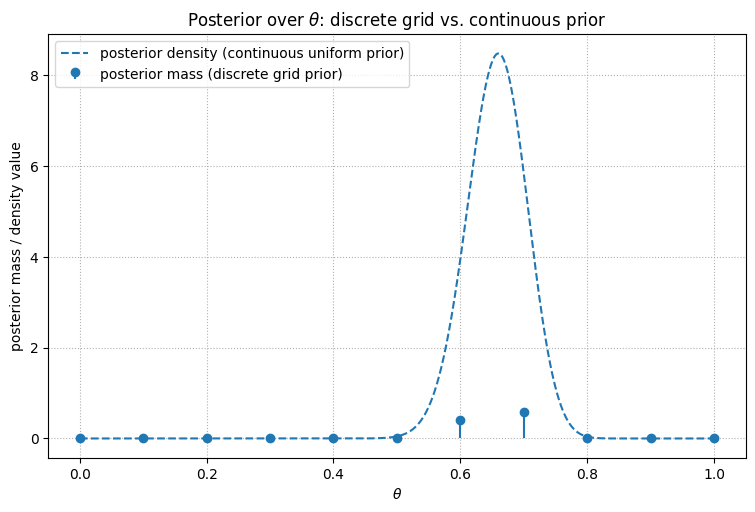

In [7]:
plt.figure(figsize=(9, 5.5))
plt.plot(
    thetas_smooth,
    posterior_density,
    label="posterior density (continuous uniform prior)",
    linestyle="--",
)
plt.stem(
    thetas_grid,
    posterior_grid,
    basefmt=" ",
    label="posterior mass (discrete grid prior)",
)
plt.title("Posterior over $\\theta$: discrete grid vs. continuous prior")
plt.xlabel(r"$\theta$")
plt.ylabel("posterior mass / density value")
plt.legend()
plt.grid(True, linestyle=":")
plt.show()


**(Q2.d)** Suppose instead that your prior distribution for $\theta$ were $\text{Beta}(1,1)$. Use Bayes’s rule to compute the posterior distribution $\pi(\theta \mid \sum_{i=1}^{100} Y_i = 66)$, and plot this posterior density.

In [8]:
alpha_post = 1 + y
beta_post = 1 + (n - y)

thetas = np.linspace(1e-6, 1 - 1e-6, 2000)
log_norm = math.lgamma(alpha_post + beta_post) - math.lgamma(alpha_post) - math.lgamma(beta_post)
log_density = (alpha_post - 1) * np.log(thetas) + (beta_post - 1) * np.log(1 - thetas) + log_norm
posterior_density = np.exp(log_density)

mean_post = alpha_post / (alpha_post + beta_post)
mode_post = (alpha_post - 1) / (alpha_post + beta_post - 2)

df = pd.DataFrame({"theta": thetas, "posterior_density": posterior_density})
print(f"posterior mean: {mean_post:.6f}")
print(f"posterior mode: {mode_post:.6f}")

posterior mean: 0.656863
posterior mode: 0.660000


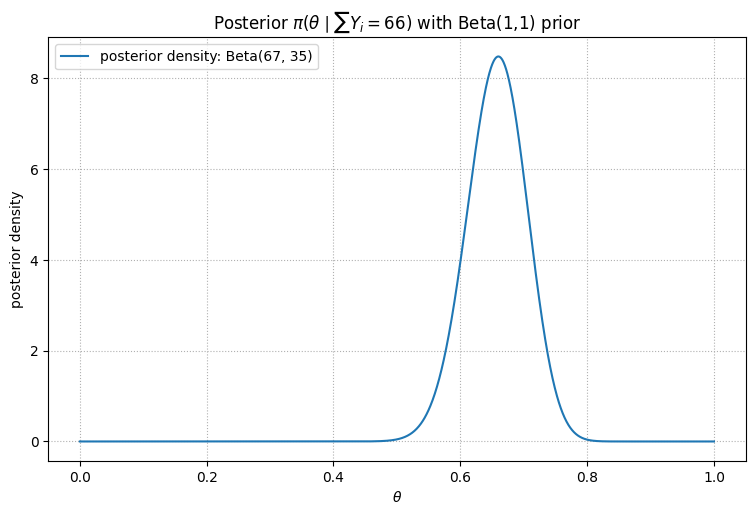

In [9]:
plt.figure(figsize=(9, 5.5))
plt.plot(thetas, posterior_density, label="posterior density: Beta(67, 35)")
plt.title(r"Posterior $\pi(\theta \mid \sum Y_i=66)$ with Beta(1,1) prior")
plt.xlabel(r"$\theta$")
plt.ylabel("posterior density")
plt.grid(True, linestyle=":")
plt.legend()
plt.show()

### **Question 3**
Estimate the probability $\theta$ of teen recidivism based on a study in which there were $n = 43$ individuals released from incarceration and $y = 15$ re-offenders within 36 months.

**(a)** Using a $\text{Beta}(2,8)$ prior for $\theta$, plot $\pi(\theta)$, $\pi(y \mid \theta)$, and $\pi(\theta \mid y)$ as functions of $\theta$. Find the posterior mean, mode, and standard deviation of $\theta$. Find a 95% credible interval.

In [10]:
def beta_pdf(theta, alpha, beta):
    theta = np.clip(theta, 1e-12, 1 - 1e-12)
    log_norm = math.lgamma(alpha + beta) - math.lgamma(alpha) - math.lgamma(beta)
    return np.exp((alpha - 1) * np.log(theta) + (beta - 1) * np.log(1 - theta) + log_norm)

In [11]:
def beta_quantile_grid(alpha, beta, grid=200000):
    # crude equal-tailed 95% interval via cumulative trapezoid
    x = np.linspace(1e-6, 1 - 1e-6, grid)
    y = beta_pdf(x, alpha, beta)
    cdf = np.cumsum((y[1:] + y[:-1]) / 2 * (x[1] - x[0]))
    cdf = np.concatenate([[0.0], cdf / cdf[-1]])
    q025 = np.interp(0.025, cdf, x)
    q975 = np.interp(0.975, cdf, x)
    return q025, q975

In [12]:
n = 43
y = 15

In [13]:
def posterior_params(alpha_prior, beta_prior, n, y):
    return alpha_prior + y, beta_prior + (n - y)

def summarize_beta(alpha, beta):
    mean = alpha / (alpha + beta)
    mode = (alpha - 1) / (alpha + beta - 2) if alpha > 1 and beta > 1 else np.nan
    var = (alpha * beta) / ((alpha + beta) ** 2 * (alpha + beta + 1))
    sd = math.sqrt(var)
    q025, q975 = beta_quantile_grid(alpha, beta)
    return {
        "alpha": alpha,
        "beta": beta,
        "mean": mean,
        "mode": mode,
        "sd": sd,
        "ci_95": (q025, q975),
    }

def plot_prior_likelihood_posterior(alpha_prior, beta_prior, n, y):
    alpha_post, beta_post = posterior_params(alpha_prior, beta_prior, n, y)
    theta = np.linspace(1e-6, 1 - 1e-6, 2000)
    prior_density = beta_pdf(theta, alpha_prior, beta_prior)
    lik_kernel = np.exp(y * np.log(theta) + (n - y) * np.log(1 - theta))
    lik_density = lik_kernel / np.trapezoid(lik_kernel, theta)
    post_density = beta_pdf(theta, alpha_post, beta_post)
    plt.figure(figsize=(9, 5.5))
    plt.plot(theta, prior_density, label=f"prior Beta({alpha_prior},{beta_prior})")
    plt.plot(theta, lik_density, linestyle="--", label="likelihood (scaled)")
    plt.plot(theta, post_density, label=f"posterior Beta({alpha_post},{beta_post})")
    plt.title("Prior, Likelihood (scaled), Posterior")
    plt.xlabel(r"$\theta$")
    plt.ylabel("density / scaled kernel")
    plt.grid(True, linestyle=":")
    plt.legend()
    plt.show()
    return summarize_beta(alpha_post, beta_post)

def mixture_prior_pdf(theta, weights, alphas, betas):
    comps = [w * beta_pdf(theta, a, b) for w, a, b in zip(weights, alphas, betas)]
    return np.sum(comps, axis=0)

def plot_mixture_prior(weights, alphas, betas):
    theta = np.linspace(1e-6, 1 - 1e-6, 2000)
    mix = mixture_prior_pdf(theta, weights, alphas, betas)
    plt.figure(figsize=(9, 5.5))
    for w, a, b in zip(weights, alphas, betas):
        plt.plot(theta, beta_pdf(theta, a, b), label=f"Beta({a},{b})")
    plt.plot(theta, mix, linestyle="--", label="mixture prior")
    plt.title("Mixture Prior and Components")
    plt.xlabel(r"$\theta$")
    plt.ylabel("prior density")
    plt.grid(True, linestyle=":")
    plt.legend()
    plt.show()

def mixture_posterior_weights(weights, alphas, betas, n, y):
    num = []
    for w, a, b in zip(weights, alphas, betas):
        num.append(w * math.exp(math.lgamma(a + b) - math.lgamma(a) - math.lgamma(b)
                                + math.lgamma(a + y) + math.lgamma(b + n - y) - math.lgamma(a + b + n)))
    num = np.array(num, dtype=float)
    den = np.sum(num)
    return (num / den).tolist()

def mixture_posterior_components(weights, alphas, betas, n, y):
    alpha_posts = [a + y for a in alphas]
    beta_posts = [b + (n - y) for b in betas]
    w_posts = mixture_posterior_weights(weights, alphas, betas, n, y)
    return w_posts, alpha_posts, beta_posts

def plot_mixture_posterior(weights, alphas, betas, n, y):
    w_post, a_post, b_post = mixture_posterior_components(weights, alphas, betas, n, y)
    theta = np.linspace(1e-6, 1 - 1e-6, 2000)
    mix_post = mixture_prior_pdf(theta, w_post, a_post, b_post)
    plt.figure(figsize=(9, 5.5))
    for w, a, b in zip(w_post, a_post, b_post):
        plt.plot(theta, beta_pdf(theta, a, b), label=f"{w:.3f}·Beta({a},{b})")
    plt.plot(theta, mix_post, linestyle="--", label="posterior mixture")
    plt.title("Mixture Posterior and Components")
    plt.xlabel(r"$\theta$")
    plt.ylabel("posterior density")
    plt.grid(True, linestyle=":")
    plt.legend()
    plt.show()
    return w_post, a_post, b_post

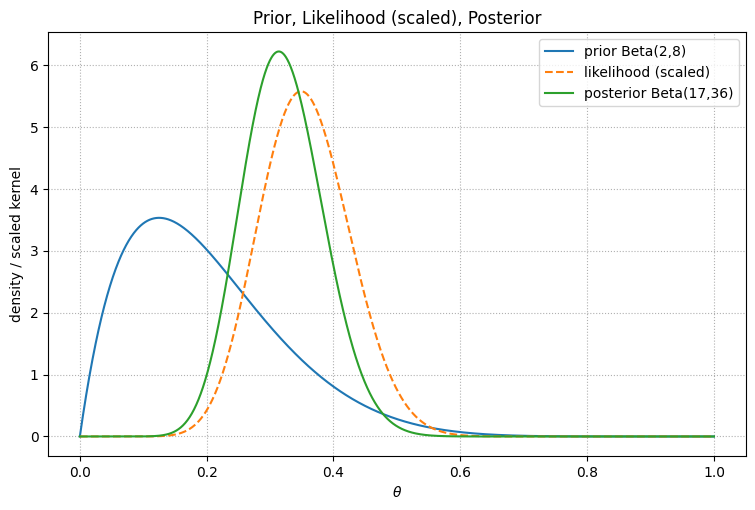

{'alpha': 17,
 'beta': 36,
 'mean': 0.32075471698113206,
 'mode': 0.3137254901960784,
 'sd': 0.0635188989834093,
 'ci_95': (np.float64(0.2032977876683944), np.float64(0.45102398235314245))}

In [14]:
plot_prior_likelihood_posterior(2, 8, n=43, y=15)

**(Q3.b)** Repeat part (a), but using a $\text{Beta}(8,2)$ prior for $\theta$.

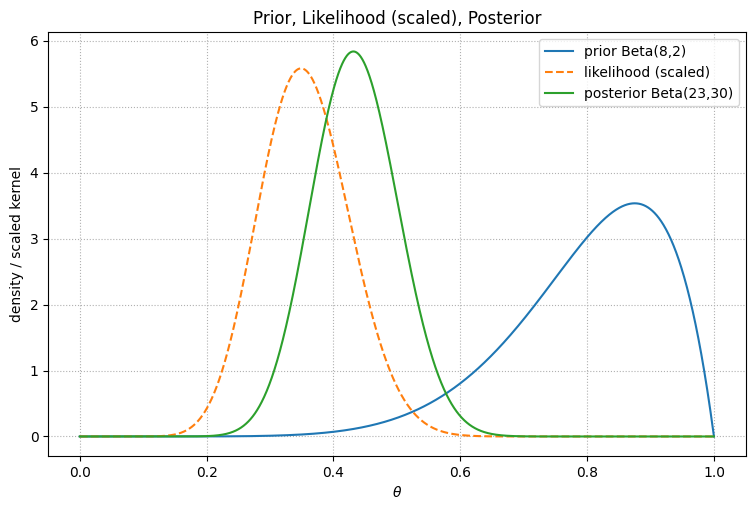

{'alpha': 23,
 'beta': 30,
 'mean': 0.4339622641509434,
 'mode': 0.43137254901960786,
 'sd': 0.06744531631926798,
 'ci_95': (np.float64(0.3046956245752609), np.float64(0.567952796061978))}

In [15]:
plot_prior_likelihood_posterior(8, 2, n=43, y=15)

**(Q3.c)** Consider the following prior distribution for $\theta$:
$$
\pi(\theta) = \frac{1}{4} \cdot \frac{\Gamma(10)}{\Gamma(2)\Gamma(8)}
\Big\{ 3 \theta (1-\theta)^7 + \theta^7 (1-\theta) \Big\},
$$
which is a 75-25% mixture of a $\text{Beta}(2,8)$ and a $\text{Beta}(8,2)$ prior distribution. Plot this prior distribution and compare it to the priors in (a) and (b). Describe what sort of prior opinion this may represent.


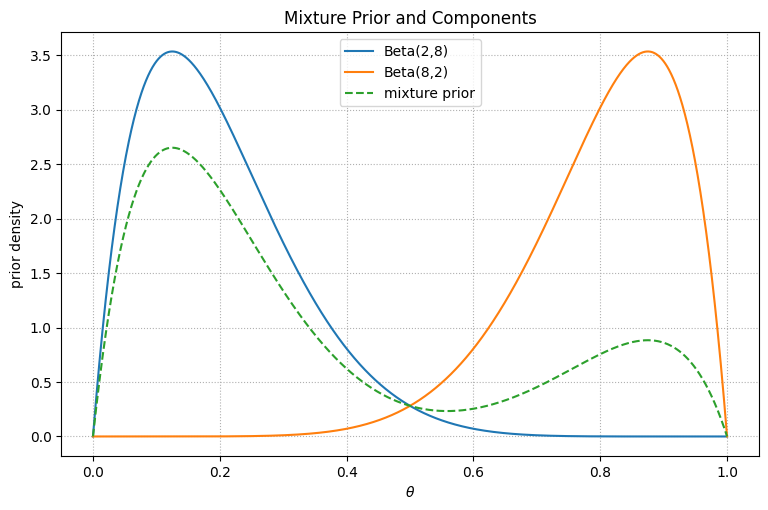

In [16]:
plot_mixture_prior(weights=[0.75, 0.25], alphas=[2, 8], betas=[8, 2])

**(Q3.d)** For the prior in (c): \
iii.  Plot $\pi(\theta)\pi(y \mid \theta)$ for a variety of $\theta$ values. Also find approximately the posterior mode, and discuss its relation to the modes in (a) and (b).



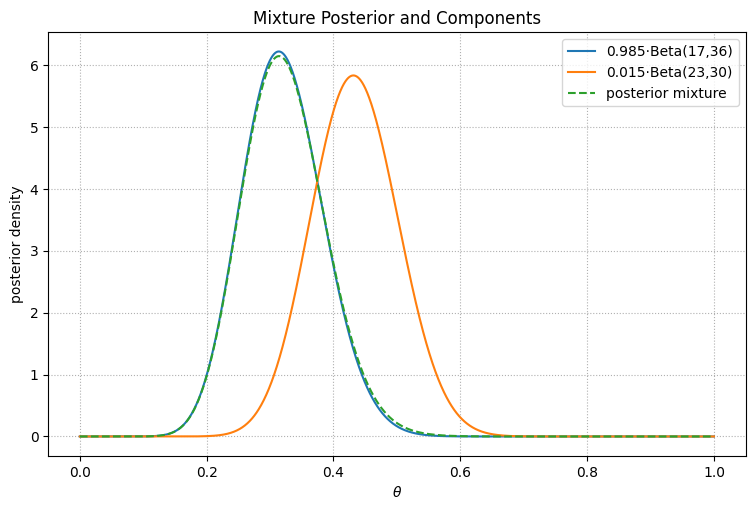

,weight,alpha_post,beta_post
0,0.984909,17,36
1,0.015091,23,30


In [17]:
w_post, a_post, b_post = plot_mixture_posterior(
    weights=[0.75, 0.25], alphas=[2, 8], betas=[8, 2], n=43, y=15
)

df = pd.DataFrame({
    "weight": w_post,
    "alpha_post": a_post,
    "beta_post": b_post
})
df.round(6)
display(df)
